Implementing YOLO v3 on the Berkeley Deep Drive Dataset using Darknet Framework.

In [ ]:
#Clone Darknet Repo to Environment
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13945, done.
remote: Total 13945 (delta 0), reused 0 (delta 0), pack-reused 13945
Receiving objects: 100% (13945/13945), 12.66 MiB | 16.05 MiB/s, done.
Resolving deltas: 100% (9487/9487), done.


In [ ]:
#Edit Makefile to have GPU, OpenCV Enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
#Verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
#Make Darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

Now that we have setup darknet, we will mount our Google Drive so that we can access our images that we will train the model on. 

In [ ]:
#give google drive folder alias so we don't have to worry about space in file path
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive/capstone_2

Archive.zip    darknet53.conv.74  nola.jpg   wofo5.mp4
backup	       detected2.mp4	  snapshots  yolo_bdd_custom.cfg
backup1        detected.mp4	  wofo3.mp4  yolo.h5
bdd_train.zip  docs		  wofo4.mp4  yolov3.weights


In [ ]:
#Define some useful Functions 

#Image Show
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image, (3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

#Upload files(images, videos) so we can detect objects
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('saved file', name)

#Download Files
def download(path):
  from google.colab import files
  files.download(path)

Before we train our custom dataset, we will see how to run the object detection by using the pretrained yolov3 weights on the coco dataset to make sure things are running properly.

In [ ]:
#print working directory
%pwd

'/content/darknet'

In [ ]:
#upload image from local machine to VM 
%cd ../
upload()

/content


Saving nola.jpg to nola.jpg
saved file nola.jpg


In [ ]:
#copy yolov3.weights to VM from Google Drive
!cp /mydrive/capstone_2/yolov3.weights ../content/darknet/

In [ ]:
#Make sure in darknet folder
%cd darknet/

/content/darknet


In [ ]:
#Run object detection on uploaded image
!./darknet detect cfg/yolov3.cfg yolov3.weights ../nola.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

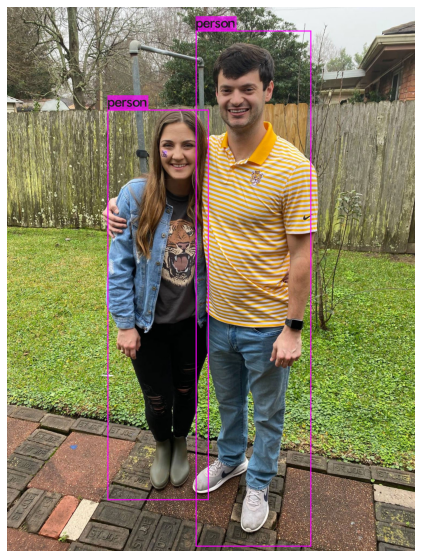

In [ ]:
#image with resulting object detection always stored as 'predictions.jpg'
#our imShow function from above will display the prediction image
imShow('predictions.jpg')

Me and my beautiful wife. Geaux Tigers. 

In [ ]:
%pwd

'/content/darknet'

In [ ]:
#copy zip of our image dataset to VM
!cp /mydrive/capstone_2/bdd_train.zip ../

In [ ]:
%pwd

'/content/darknet'

In [ ]:
%cd ..

/content


In [ ]:
#Unzip 100k.zip file and its content should be in /darknet/data/bdd_train
!unzip ../content/bdd_train.zip -d darknet/data

Streaming output truncated to the last 5000 lines.
  inflating: darknet/data/__MACOSX/bdd_train/val/._b6a5e5f0-73e9525b.jpg  
  inflating: darknet/data/bdd_train/val/c993615f-33101e6b.txt  
  inflating: darknet/data/bdd_train/val/b433534e-ff3646aa.txt  
  inflating: darknet/data/bdd_train/val/b4f4bd95-a097514a.jpg  
  inflating: darknet/data/__MACOSX/bdd_train/val/._b4f4bd95-a097514a.jpg  
  inflating: darknet/data/bdd_train/val/c734eb0a-125bba62.txt  
  inflating: darknet/data/bdd_train/val/bf9e3b67-49c1ef1c.txt  
  inflating: darknet/data/bdd_train/val/bdaeda37-a0d637e0.jpg  
  inflating: darknet/data/__MACOSX/bdd_train/val/._bdaeda37-a0d637e0.jpg  
  inflating: darknet/data/bdd_train/val/b1cebfb7-284f5117.jpg  
  inflating: darknet/data/__MACOSX/bdd_train/val/._b1cebfb7-284f5117.jpg  
  inflating: darknet/data/bdd_train/val/b7fd3f86-5366a23c.txt  
  inflating: darknet/data/bdd_train/val/b714a088-e91ac24f.txt  
  inflating: darknet/data/bdd_train/val/bcaf73c1-7be6ff05.txt  
  inflati

In [ ]:
#create train.txt, test.txt, data.data
%pwd

'/content'

In [ ]:
%cd darknet/data/

/content/darknet/data


In [ ]:
%ls -p

9k.tree     dog.jpg      horses.jpg                __MACOSX/         voc.names
bdd_train/  eagle.jpg    imagenet.labels.list      openimages.names
coco9k.map  giraffe.jpg  imagenet.shortnames.list  person.jpg
coco.names  goal.txt     labels/                   scream.jpg


In [ ]:
%pwd 

'/content/darknet/data'

In [ ]:
%cd ../

/content/darknet


In [ ]:
path_images = 'data/bdd_train/'
path_train = 'train/'
path_val = 'val/'


#create data.data file
#We have 10 classes: bike, bus, car, motor, person, rider, traffic light, traffic sign, train, truck
c = 0

with open(path_images  + 'classes.names', 'w') as names, \
     open(path_images + path_train + 'classes.txt', 'r') as txt:
  for line in txt:
    names.write(line)

    c+=1

In [ ]:
print(c)

10


In [ ]:
with open(path_images + 'bdd.data', 'w') as data:
  data.write('classes = ' + str(c) + '\n')
  data.write('train = ' + path_images + 'train.txt' + '\n')
  data.write('valid = ' + path_images + 'test.txt' + '\n')
  data.write('names = ' + path_images + 'classes.names' + '\n')
  data.write('backup = /mydrive/capstone_2/backup')

In [ ]:
%pwd

'/content/darknet'

In [ ]:
#create train.txt and test.txt files

import os

path_train = 'data/bdd_train/train/'

os.chdir(path_train)
p=[]

for current_dir, dirs, files in os.walk('.'):
  for f in files:
    if f.endswith('.jpg'):
      path_to_save = path_train + f
      p.append(path_to_save + '\n')

print('There are ' + str(len(p)) + ' images in our training set.')

There are 70000 images in our training set.


In [ ]:
%cd ../

/content/darknet/data/bdd_train


In [ ]:
#write train.txt
with open('train.txt', 'w') as train:
  for e in p:
    train.write(e)

In [ ]:
%pwd

'/content/darknet/data/bdd_train'

In [ ]:
%cd ../../

/content/darknet


In [ ]:
#write test.txt

import os

path_val = 'data/bdd_train/val/'

os.chdir(path_val)
p_test = []

for current_dir, dirs, files in os.walk('.'):
  for f in files:
    if f.endswith('.jpg'):
      path_to_save = path_val + f
      p_test.append(path_to_save + '\n')

print('There are ' + str(len(p_test)) + ' images in our test set.')

There are 10000 images in our test set.


In [ ]:
%pwd

'/content/darknet/data/bdd_train/val'

In [ ]:
%cd ../

/content/darknet/data/bdd_train


In [ ]:
#write test.txt
with open('test.txt','w') as test:
  for e in p_test:
    test.write(e)

In [ ]:
%cd darknet/

/content/darknet


In [ ]:
#copy custom .cfg file to VM from Google Drive
!cp /mydrive/capstone_2/yolo_bdd_custom.cfg ./cfg

In [ ]:
%ls cfg

9k.labels                                   resnet152_trident.cfg
9k.names                                    resnet50.cfg
9k.tree                                     resnext152-32x4d.cfg
alexnet.cfg                                 rnn.cfg
cd53paspp-gamma.cfg                         rnn.train.cfg
cifar.cfg                                   strided.cfg
cifar.test.cfg                              t1.test.cfg
coco9k.map                                  tiny.cfg
coco.data                                   tiny-yolo.cfg
coco.names                                  tiny-yolo-voc.cfg
combine9k.data                              tiny-yolo_xnor.cfg
crnn.train.cfg                              vgg-16.cfg
csdarknet53-omega.cfg                       vgg-conv.cfg
csresnext50-panet-spp.cfg                   voc.data
csresnext50-panet-spp-original-optimal.cfg  writing.cfg
darknet19_448.cfg                           yolo.2.0.cfg
darknet19.cfg                               yolo9000.cfg
darknet53_448_xnor.

In [ ]:
%cd ..

/content


In [ ]:
#Copy darknet53 weights from Google Drive to VM to begin training
!cp /mydrive/capstone_2/backup/yolo_bdd_custom_4000.weights ./darknet/

In [ ]:
#train our dataset on images, always make sure in darknet folder before beginning
%cd darknet/

/content/darknet


In [ ]:
%ls -p

3rdparty/          DarknetConfig.cmake.in  net_cam_v3.sh
backup/            darknet.py              obj/
build/             darknet_video.py        README.md
build.ps1          data/                   results/
build.sh           image_yolov2.sh         scripts/
cfg/               image_yolov3.sh         src/
cmake/             include/                video_v2.sh
CMakeLists.txt     json_mjpeg_streams.sh   video_yolov3.sh
darknet            LICENSE                 yolo_bdd_custom_4000.weights
darknet53.conv.74  Makefile


In [ ]:
#Training on BDD. Normally would begin with darknet53.conv.74 as starting weights. Here used previously trained saved weight to pickup where I left off. 
!./darknet detector train data/bdd_train/bdd.data cfg/yolo_bdd_custom.cfg yolo_bdd_custom_4000.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.598260, GIOU: 0.568443), Class: 0.850692, Obj: 0.416683, No Obj: 0.001402, .5R: 0.661765, .75R: 0.205882, count: 68, class_loss = 11.299419, iou_loss = 7.190048, total_loss = 18.489468 
 total_bbox = 4797930, rewritten_bbox = 5.372025 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000509, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000391, iou_loss = 0.000000, total_loss = 0.000391 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.813108, GIOU: 0.806280), Class: 0.838964, Obj: 0.681115, No Obj: 0.002958, .5R: 1.000000, .75R: 0.842105, count: 19, class_loss = 2.330634, iou_loss = 0.838201, total_loss = 3.168835 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.568864, GIOU: 0.532960), Class: 0.881663, Obj: 0.337963, N